**<center> <font size = "5"> Multi-class logistic regression with TensorFlow </font> <center>**

### I. Preprocessing of the data

Load the libraries.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

Load the dataset.

In [2]:
# Load the dataset
import pandas as pd
df=pd.read_csv("Red_wine_quality.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Detect outliers. Outliers will have label "-1" while non-outliers will have label "1".

In [3]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df)
outlier_label=pd.DataFrame(clf.predict(df))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
1594,1
1595,1
1596,1
1597,1


Attach the otulier labels to the dataset and remove the outlier rows.

In [4]:
df = pd.concat([df,outlier_label], axis=1, sort=False)
df=df.loc[df["outlier_label"] == 1]
df=df.drop(["outlier_label"],axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The original dataset has 1599 rows. The dataset with the outlier removed has 1439 rows. So, IsolationForest detected and removed 160 outliers from the predictor variables.

Output the feature importance score for reach predictor variable.

First, seperate the predictor variables and target variables. The target variable is the "quality" column. All other columns are predictor variables.

In [5]:
# Seperate the predictor variables and target variables.
X=df.drop(["quality"],axis=1)
y=df[["quality"]]
print(X.shape)
print(y.shape)

(1439, 11)
(1439, 1)


Let's see how many unique classes there are.

In [6]:
import numpy as np
length=len(np.unique(y))
print(np.unique(y))
print("There are ",length," unique classes.")

[3 4 5 6 7 8]
There are  6  unique classes.


Calculate the feature importance score for each predictor variable and sort them in ascending order.

In [7]:
# Import the libraries.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k=11)
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
3,1.672070
4,3.832117
8,4.024580
5,5.767481
0,7.407470
7,11.318385
2,20.853718
6,35.145856
9,42.880299
1,49.619682


The most important feature has column index 6. That is "total_sulfur_dioxide". The least important feature has column index 7. That is density.

I am going to select the 8 most important features. To do so, I am going to count 8 features, starting from the bottom of the list above.

In [8]:
X = X.iloc[:, [10,1,9,6,2,7,0,5]]
X

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,free_sulfur_dioxide
0,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0
1,9.8,0.880,0.68,67.0,0.00,0.99680,7.8,25.0
2,9.8,0.760,0.65,54.0,0.04,0.99700,7.8,15.0
3,9.8,0.280,0.58,60.0,0.56,0.99800,11.2,17.0
4,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.58,44.0,0.08,0.99490,6.2,32.0
1595,11.2,0.550,0.76,51.0,0.10,0.99512,5.9,39.0
1596,11.0,0.510,0.75,40.0,0.13,0.99574,6.3,29.0
1597,10.2,0.645,0.71,44.0,0.12,0.99547,5.9,32.0


Standardize the predictor variables.

In [9]:
# Standardized the new dataset that has the outliers removed and contain only the 8 most important features.
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,free_sulfur_dioxide
0,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
1,-0.586054,2.090154,0.277403,0.776855,-1.405793,0.059232,-0.292828,1.024563
2,-0.586054,1.382785,0.055017,0.338425,-1.188809,0.182067,-0.292828,-0.029633
3,-0.586054,-1.446689,-0.463884,0.540777,1.631974,0.796243,1.882859,0.181206
4,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
...,...,...,...,...,...,...,...,...
1434,0.125461,0.439627,-0.463884,0.001172,-0.971826,-1.107701,-1.316681,1.762500
1435,0.836976,0.144890,0.870433,0.237249,-0.863334,-0.972582,-1.508653,2.500438
1436,0.633686,-0.090899,0.796304,-0.133730,-0.700597,-0.591793,-1.252690,1.446241
1437,-0.179474,0.704890,0.499789,0.001172,-0.754843,-0.757621,-1.508653,1.762500


Split the data into train and test subsets

In [10]:
# split the dataset into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

### II. Multi-class logistic regression with TensorFlow

Create placeholders.

In [11]:
# numFeatures is the number of features in our input data.

numFeatures = X_train.shape[1]

# numLabels is the number of classes our data points can be in.

numLabels = y_train.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) 
yGold = tf.placeholder(tf.float32, [None, numLabels]) 

Set weights and biases for the model.We initialize both W and b as tensors full of zeros. Since we are going to learn W and b, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

In [12]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

Build the multi-class logistic regression model with TensorFlow.

Build the components first.

In [13]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

Define the cost function and how long the model will be trained for.

In [14]:
# Number of Epochs in our training
numEpochs = 1000

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [15]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

We need to initialize our weights and biases with zeros or random values via the inbuilt Initialization Op, tf.initialize_all_variables(). This Initialization Op will become a node in our computational graph, and when we put the graph into a session, then the Op will run and create the variables.

In [16]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

We also want some additional operations to keep track of our model's efficiency over time.

In [17]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

Define and run the actual training loop.

In [22]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: X_train, yGold: y_train})
        # Report occasional stats
        if i % 100 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: X_train, yGold: y_train})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: y_test})))

step 0, training accuracy 1, cost 11917.2, change in cost 11917.2
step 100, training accuracy 1, cost 11917.1, change in cost 0.112305
step 200, training accuracy 1, cost 11917, change in cost 0.0966797
step 300, training accuracy 1, cost 11917, change in cost 0.078125
step 400, training accuracy 1, cost 11916.9, change in cost 0.0693359
step 500, training accuracy 1, cost 11916.8, change in cost 0.0585938
step 600, training accuracy 1, cost 11916.8, change in cost 0.0527344
step 700, training accuracy 1, cost 11916.7, change in cost 0.046875
step 800, training accuracy 1, cost 11916.7, change in cost 0.0390625
step 900, training accuracy 1, cost 11916.7, change in cost 0.0361328
final accuracy on test set: 1.0


Final accuracy on test set is 100%. Very commendable!

Let's visualize the accuracy vs cost.

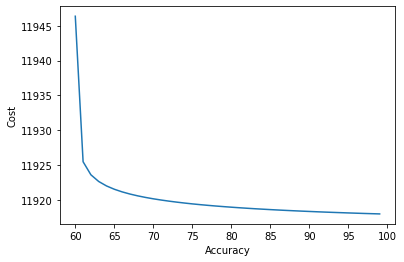

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-60:i]) for i in range(len(cost_values))])
plt.xlabel("Accuracy")
plt.ylabel("Cost")
plt.show()

With the parameters defined as above, the model has a 100% accuracy on the test data. But let's output the results and see them with our eyes.

"sess.run" compares the predicted label with the actual label and outputs True for correct predictions and False for incorrect predictions.

In [21]:
array=sess.run(correct_predictions_OP,feed_dict={X:X_test,yGold:y_test})
pred=pd.DataFrame(data=array, columns=["Correct=True"])
pred

,Correct=True
0,True
1,True
2,True
3,True
4,True
...,...
355,True
356,True
357,True
358,True


Let's double-check if there is any row that the "sess.run" does not output True. For a 100% accuracy, we would expect that such conditional selection would output nothing.

In [30]:
pred[pred["Correct=True"] != True]

,Correct=True


The conditional selection yields no output. That means the model really correctly predicted all the labels in the test data.